In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [ ]:
df.shape

(3554, 18)

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159


In [ ]:
train_df = df.drop(columns=['society','price_per_sqft'])

<Axes: xlabel='luxury_score'>

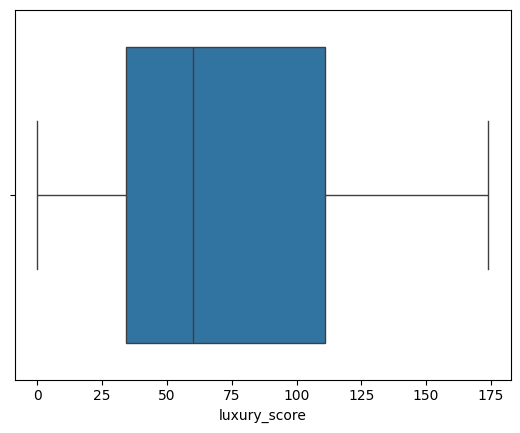

In [ ]:
sns.boxplot(x=df['luxury_score'])

In [ ]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None

In [ ]:
train_df['luxury_category']=train_df['luxury_score'].apply(categorize_luxury)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8,Low
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38,Low
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49,Low
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174,High
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159,High


<Axes: xlabel='floorNum'>

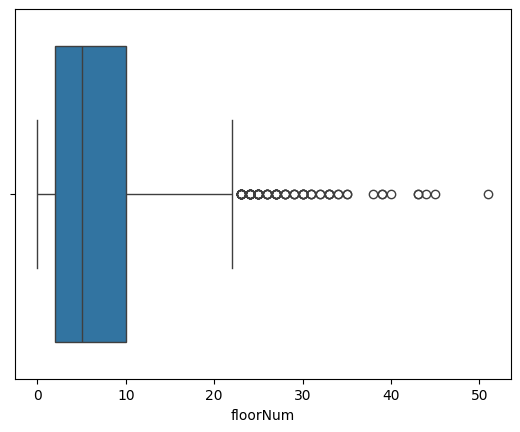

In [ ]:
sns.boxplot(x=df['floorNum'])

In [ ]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Rise"
    elif 3 <= floor <= 10:
        return "Mid Rise"
    elif 11 <= floor <= 51:
        return "High Rise"
    else:
        return None

In [ ]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8,Low,Low Rise
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38,Low,Mid Rise
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49,Low,High Rise
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174,High,Mid Rise
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159,High,Mid Rise


In [ ]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   sector           3554 non-null   object 
 2   price            3554 non-null   float64
 3   bedRoom          3554 non-null   int64  
 4   bathroom         3554 non-null   int64  
 5   balcony          3554 non-null   object 
 6   agePossession    3554 non-null   object 
 7   built_up_area    3554 non-null   float64
 8   study room       3554 non-null   int64  
 9   servant room     3554 non-null   int64  
 10  store room       3554 non-null   int64  
 11  pooja room       3554 non-null   int64  
 12  others           3554 non-null   int64  
 13  furnishing_type  3554 non-null   int64  
 14  luxury_category  3554 non-null   object 
 15  floor_category   3554 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 444.4+ KB


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
data_label_encoded = train_df.copy()
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [ ]:
X_label['sector'].nunique()

104

In [ ]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3,2,2.0,1.0,850.0,0,0,0,0,0,0,1.0,1.0
1,0.0,95.0,2,2,2.0,1.0,1226.0,1,1,0,0,0,0,1.0,2.0
2,0.0,103.0,2,2,1.0,1.0,1000.0,0,0,0,0,0,0,1.0,0.0
3,0.0,99.0,3,4,4.0,3.0,1615.0,0,1,0,0,1,1,0.0,2.0
4,0.0,5.0,2,2,1.0,3.0,582.0,0,0,1,0,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2,2,1.0,3.0,532.0,0,0,0,0,0,0,2.0,2.0
3550,1.0,12.0,5,5,4.0,3.0,6228.0,1,1,1,1,0,0,0.0,1.0
3551,0.0,23.0,1,1,1.0,0.0,665.0,0,0,0,0,0,1,2.0,2.0
3552,1.0,44.0,5,6,3.0,0.0,5490.0,1,1,1,1,0,0,2.0,2.0


In [ ]:
y_label

,price
0,0.82
1,0.95
2,0.32
3,1.60
4,0.48
...,...
3549,0.37
3550,6.00
3551,0.60
3552,15.50


<Axes: >

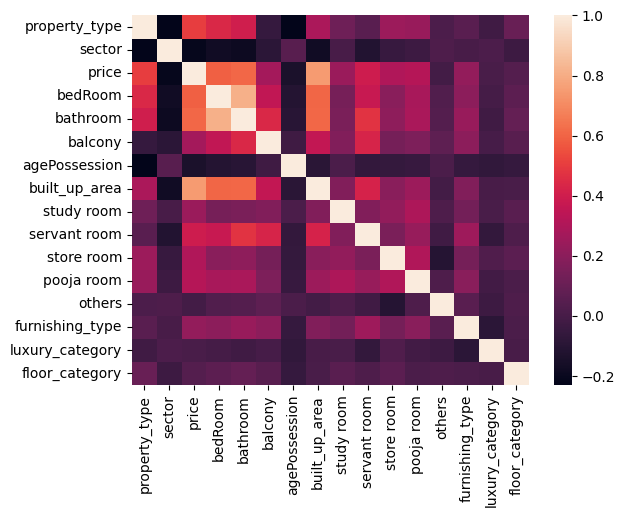

In [ ]:
sns.heatmap(data_label_encoded.select_dtypes(include='number').corr())

In [ ]:
df1=data_label_encoded.select_dtypes(include='number').corr()['price'].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
df1

,feature,corr_coeff
0,property_type,0.503728
1,sector,-0.212084
2,price,1.000000
3,bedRoom,0.591289
4,bathroom,0.609777
5,balcony,0.269637
6,agePossession,-0.142536
7,built_up_area,0.748651
8,study room,0.242955
9,servant room,0.391930


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_label=RandomForestRegressor(n_estimators=100,random_state=42)
rf_label.fit(X_label,y_label)
df2=pd.DataFrame({
    'feature':X_label.columns,
    'rf_importance':rf_label.feature_importances_
}).sort_values(by='rf_importance',ascending=False)
df2

,feature,rf_importance
6,built_up_area,0.650370
1,sector,0.102858
0,property_type,0.100154
3,bathroom,0.026912
2,bedRoom,0.023003
8,servant room,0.019287
5,agePossession,0.013873
4,balcony,0.012688
12,furnishing_type,0.010807
9,store room,0.008328


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_label=GradientBoostingRegressor()
gb_label.fit(X_label,y_label)
df3=pd.DataFrame({
    'feature':X_label.columns,
    'gb_importance':gb_label.feature_importances_
}).sort_values(by='gb_importance',ascending=False)
df3

,feature,gb_importance
6,built_up_area,0.677408
1,sector,0.105208
0,property_type,0.097716
2,bedRoom,0.037215
3,bathroom,0.036100
8,servant room,0.022789
9,store room,0.010291
5,agePossession,0.004702
7,study room,0.002867
12,furnishing_type,0.002107


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

df4

,feature,permutation_importance
6,built_up_area,0.734651
0,property_type,0.202148
1,sector,0.178643
3,bathroom,0.026063
2,bedRoom,0.021466
8,servant room,0.019563
5,agePossession,0.003357
11,others,0.000509
14,floor_category,0.000356
13,luxury_category,-0.000018


In [ ]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)
lasso=Lasso(alpha=0.01,random_state=42)
lasso.fit(X_scaled,y_label)
df8 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

df8

,feature,lasso_coeff
6,built_up_area,1.509821
0,property_type,0.710288
3,bathroom,0.273814
9,store room,0.199750
7,study room,0.172618
12,furnishing_type,0.163808
8,servant room,0.160245
10,pooja room,0.074165
13,luxury_category,0.054418
2,bedRoom,0.015444


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

df5 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

df5

,feature,reg_coeffs
6,built_up_area,1.512099
0,property_type,0.707938
3,bathroom,0.281159
9,store room,0.204274
7,study room,0.181144
12,furnishing_type,0.172608
8,servant room,0.168914
10,pooja room,0.077261
13,luxury_category,0.065144
2,bedRoom,0.018006


In [ ]:
from sklearn.feature_selection import RFE
estimator = RandomForestRegressor()
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

selected_features = X_label.columns[selector_label.support_]
selected_coefficients = selector_label.estimator_.feature_importances_

df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

df6

,feature,rfe_score
6,built_up_area,0.646797
1,sector,0.102460
0,property_type,0.101851
2,bedRoom,0.026563
3,bathroom,0.025055
8,servant room,0.020636
5,agePossession,0.014937
4,balcony,0.011556
12,furnishing_type,0.010339
7,study room,0.010093


In [ ]:
final_df = df1.merge(df2,on='feature').merge(df3,on='feature').merge(df4,on='feature').merge(df5,on='feature').merge(df6,on='feature').merge(df8,on='feature').set_index('feature')

In [ ]:
final_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,reg_coeffs,rfe_score,lasso_coeff
feature,,,,,,,
property_type,0.503728,0.100154,0.097716,0.202148,0.707938,0.101851,0.710288
sector,-0.212084,0.102858,0.105208,0.178643,-0.078548,0.102460,-0.069467
bedRoom,0.591289,0.023003,0.037215,0.021466,0.018006,0.026563,0.015444
bathroom,0.609777,0.026912,0.036100,0.026063,0.281159,0.025055,0.273814
balcony,0.269637,0.012688,0.001611,-0.000315,-0.066714,0.011556,-0.043665
agePossession,-0.142536,0.013873,0.004702,0.003357,-0.019984,0.014937,-0.012137
built_up_area,0.748651,0.650370,0.677408,0.734651,1.512099,0.646797,1.509821
study room,0.242955,0.008297,0.002867,-0.018401,0.181144,0.010093,0.172618
servant room,0.391930,0.019287,0.022789,0.019563,0.168914,0.020636,0.160245


In [ ]:
final_df=final_df.divide(final_df.sum(axis=0),axis=1)

In [ ]:
final_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
built_up_area,0.652233
property_type,0.118568
sector,0.116195
bathroom,0.027643
bedRoom,0.026329
servant room,0.019901
agePossession,0.009102
store room,0.006558
balcony,0.006396


In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

np.float64(0.8209317235205751)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'others','study room']), y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

np.float64(0.8184910420233786)

In [ ]:
export_df = X_label.drop(columns=['pooja room', 'others','study room'])
export_df['price'] = y_label

In [ ]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [ ]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,36.0,3,2,2.0,1.0,850.0,0,0,0,1.0,1.0,0.82
1,0.0,95.0,2,2,2.0,1.0,1226.0,1,0,0,1.0,2.0,0.95
2,0.0,103.0,2,2,1.0,1.0,1000.0,0,0,0,1.0,0.0,0.32
3,0.0,99.0,3,4,4.0,3.0,1615.0,1,0,1,0.0,2.0,1.60
4,0.0,5.0,2,2,1.0,3.0,582.0,0,1,0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2,2,1.0,3.0,532.0,0,0,0,2.0,2.0,0.37
3550,1.0,12.0,5,5,4.0,3.0,6228.0,1,1,0,0.0,1.0,6.00
3551,0.0,23.0,1,1,1.0,0.0,665.0,0,0,1,2.0,2.0,0.60
3552,1.0,44.0,5,6,3.0,0.0,5490.0,1,1,0,2.0,2.0,15.50


In [132]:
train_df.drop(columns=['study room','pooja room','others'],inplace=True)

In [133]:
train_df.to_csv('without_encoding_feature_selection.csv',index=False)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,New Property,850.0,0,0,0,Low,Low Rise
1,flat,sector 89,0.95,2,2,2,New Property,1226.0,1,0,0,Low,Mid Rise
2,flat,sohna road,0.32,2,2,1,New Property,1000.0,0,0,0,Low,High Rise
3,flat,sector 92,1.60,3,4,3+,Relatively New,1615.0,1,0,1,High,Mid Rise
4,flat,sector 102,0.48,2,2,1,Relatively New,582.0,0,1,0,High,Mid Rise
